In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install mlxtend  

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd  
from mlxtend.frequent_patterns import apriori, association_rules  

# Sample transaction dataset  
data = {'Transaction': [1, 1, 1, 2, 2, 3, 3, 3, 4, 4],  
        'Item': ['Bread', 'Milk', 'Diaper',   
                 'Bread', 'Diaper',   
                 'Bread', 'Milk', 'Diaper',   
                 'Milk', 'Diaper']}  

df = pd.DataFrame(data)  
print(df) 

# Create a basket format  
basket = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().fillna(0)  
basket = basket.reset_index().set_index('Transaction')  
basket = basket.applymap(lambda x: 1 if x > 0 else 0) 
print(basket)

# Applying the Apriori algorithm  
frequent_itemsets = apriori(basket, min_support=0.3, use_colnames=True)  

# Generating association rules  
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  

print("Frequent Itemsets:")  
print(frequent_itemsets)  

print("\nAssociation Rules:")  
print(rules)

   Transaction    Item
0            1   Bread
1            1    Milk
2            1  Diaper
3            2   Bread
4            2  Diaper
5            3   Bread
6            3    Milk
7            3  Diaper
8            4    Milk
9            4  Diaper
Item         Bread  Diaper  Milk
Transaction                     
1                1       1     1
2                1       1     0
3                1       1     1
4                0       1     1
Frequent Itemsets:
   support               itemsets
0     0.75                (Bread)
1     1.00               (Diaper)
2     0.75                 (Milk)
3     0.75        (Diaper, Bread)
4     0.50          (Milk, Bread)
5     0.75         (Diaper, Milk)
6     0.50  (Diaper, Milk, Bread)

Association Rules:
     antecedents consequents  antecedent support  consequent support  support  \
0       (Diaper)     (Bread)                1.00                0.75     0.75   
1        (Bread)    (Diaper)                0.75                1.00     0.7

/tmp/ipykernel_37/1159465166.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [4]:
pip install pandas mlxtend

Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd  
from mlxtend.frequent_patterns import apriori, association_rules  

# Sample trajectory data  
# Each trajectory is represented as a list of locations visited in sequence.  
data = {  
    'Trajectory ID': [1, 1, 1, 2, 2, 3, 3, 4, 4],  
    'Location': ['A', 'C', 'D',   
                 'A', 'B',   
                 'C', 'D',   
                 'B', 'A']  
}  

# Create a DataFrame  
df = pd.DataFrame(data)  

# Creating the basket format  
# We need to treat each unique trajectory as a set of locations.  
basket = df.groupby(['Trajectory ID', 'Location'])['Location'].count().unstack().fillna(0)  
basket = basket.reset_index().set_index('Trajectory ID')  
basket = basket.applymap(lambda x: 1 if x > 0 else 0)  
print(basket)

# Applying the Apriori algorithm to find frequent location patterns  
frequent_itemsets = apriori(basket, min_support=0.5, use_colnames=True)  

# Generating association rules  
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7)  

print("Frequent Location Patterns:")  
print(frequent_itemsets)  

print("\nAssociation Rules:")  
print(rules)

Location       A  B  C  D
Trajectory ID            
1              1  0  1  1
2              1  1  0  0
3              0  0  1  1
4              1  1  0  0
Frequent Location Patterns:
   support itemsets
0     0.75      (A)
1     0.50      (B)
2     0.50      (C)
3     0.50      (D)
4     0.50   (B, A)
5     0.50   (C, D)

Association Rules:
  antecedents consequents  antecedent support  consequent support  support  \
0         (B)         (A)                 0.5                0.75      0.5   
1         (C)         (D)                 0.5                0.50      0.5   
2         (D)         (C)                 0.5                0.50      0.5   

   confidence      lift  leverage  conviction  zhangs_metric  
0         1.0  1.333333     0.125         inf            0.5  
1         1.0  2.000000     0.250         inf            1.0  
2         1.0  2.000000     0.250         inf            1.0  


/tmp/ipykernel_37/2996105324.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)
/opt/conda/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [12]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 4.8 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812364 sha256=aab7131a64b96153424e115dd2a3321955f917aaa3c7495be64778eb45843e0f
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark
Note: you may need to restart the kernel to use updated packages.


In [13]:
from pyspark.sql import SparkSession  
from pyspark.ml.fpm import FPGrowth  

spark = SparkSession.builder.appName("FrequentPatternMining").getOrCreate()  

# Load your data as a DataFrame  
data = spark.createDataFrame([  
    (0, ['A', 'B', 'C']),  
    (1, ['A', 'D']),  
    (2, ['C', 'D']),  
    (3, ['B', 'A'])  
], ["id", "items"])  

# Apply the FPGrowth algorithm  
fpg = FPGrowth(itemsCol="items", minSupport=0.5, minConfidence=0.6)  
model = fpg.fit(data)  

# Display frequent itemsets  
model.freqItemsets.show()  

# Display generated association rules  
model.associationRules.show()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/09/14 09:51:03 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


+------+----+
| items|freq|
+------+----+
|   [A]|   3|
|   [D]|   2|
|   [B]|   2|
|[B, A]|   2|
|   [C]|   2|
+------+----+

+----------+----------+------------------+------------------+-------+
|antecedent|consequent|        confidence|              lift|support|
+----------+----------+------------------+------------------+-------+
|       [A]|       [B]|0.6666666666666666|1.3333333333333333|    0.5|
|       [B]|       [A]|               1.0|1.3333333333333333|    0.5|
+----------+----------+------------------+------------------+-------+



In [18]:
import pandas as pd  
from itertools import combinations  

def load_data():  
    # Sample transaction data  
    data = {  
        'TransactionID': [1, 2, 3, 4, 5, 6],  
        'Items': [  
            ['A', 'B', 'C'],  
            ['A', 'B', 'D'],  
            ['A', 'C'],  
            ['B', 'D'],  
            ['B', 'C'],  
            ['A', 'B', 'C', 'D']  
        ]  
    }  
    return pd.DataFrame(data)  

def create_c1(transactions):  
    """Create initial candidate itemset C1."""  
    C1 = []  
    for transaction in transactions:  
        for item in transaction:  
            if [item] not in C1:  
                C1.append([item])  
    return sorted([sorted(x) for x in C1])  

def scan_transactions(transactions, candidates, min_support):  
    """Scan transactions and return the frequent itemsets and their support count."""  
    item_count = {}  
    for transaction in transactions:  
        transaction_set = set(transaction)  
        for candidate in candidates:  
            if set(candidate).issubset(transaction_set):  
                if tuple(candidate) not in item_count:  
                    item_count[tuple(candidate)] = 0  
                item_count[tuple(candidate)] += 1  
    
    # Filter candidates by minimum support  
    frequent_itemsets = []  
    support_data = {}  
    num_transactions = len(transactions)  
    for item, count in item_count.items():  
        support = count / num_transactions  
        if support >= min_support:  
            frequent_itemsets.append(list(item))  
            support_data[item] = support  
            
    return frequent_itemsets, support_data  

def apriori(transactions, min_support=0.5):  
    """Apriori Algorithm."""  
    C1 = create_c1(transactions)  
    print("- C1 is:", C1) 
    D = list(map(set, transactions))  
    print("- D is:", D)
    
    frequent_itemsets, support_data = scan_transactions(D, C1, min_support)  
    print("-", frequent_itemsets)
    print("-", support_data)
    all_frequent_itemsets = [frequent_itemsets]  

    k = 2  
    while frequent_itemsets:  
        # Generate new candidate itemsets  
        Ck = list(combinations(sorted(set(item for sublist in frequent_itemsets for item in sublist)), k))  
        frequent_itemsets, support_dict_k = scan_transactions(D, Ck, min_support)  
        support_data.update(support_dict_k)  
        all_frequent_itemsets.append(frequent_itemsets)  
        k += 1  
        
    return all_frequent_itemsets, support_data  

# Load sample data  
df = load_data()  

# Get transactions  
transactions = df['Items'].tolist()  

# Run Apriori algorithm  
min_support = 0.5  
frequent_itemsets, support_data = apriori(transactions, min_support)  

# Print results  
for i, itemsets in enumerate(frequent_itemsets):  
    print(f"Frequent itemsets of length {i}:", itemsets)  

print("\nSupport Data:")  
for itemset, support in support_data.items():  
    print(f"{list(itemset)}: {support:.2f}")

- C1 is: [['A'], ['B'], ['C'], ['D']]
- D is: [{'B', 'C', 'A'}, {'B', 'A', 'D'}, {'C', 'A'}, {'B', 'D'}, {'C', 'B'}, {'B', 'C', 'A', 'D'}]
- [['A'], ['B'], ['C'], ['D']]
- {('A',): 0.6666666666666666, ('B',): 0.8333333333333334, ('C',): 0.6666666666666666, ('D',): 0.5}
Frequent itemsets of length 0: [['A'], ['B'], ['C'], ['D']]
Frequent itemsets of length 1: [['A', 'B'], ['A', 'C'], ['B', 'C'], ['B', 'D']]
Frequent itemsets of length 2: []

Support Data:
['A']: 0.67
['B']: 0.83
['C']: 0.67
['D']: 0.50
['A', 'B']: 0.50
['A', 'C']: 0.50
['B', 'C']: 0.50
['B', 'D']: 0.50


In [22]:
from mlxtend.frequent_patterns import apriori, association_rules  

# Sample transaction data  
transactions = [  
    ['A', 'B', 'C'],  
    ['B', 'C', 'D'],  
    ['C', 'C'],  
    ['A', 'B', 'D'],  
    ['A', 'B', 'C'],  
]  

# Transaction encoding  
from mlxtend.preprocessing import TransactionEncoder  
encoder = TransactionEncoder()  
encoder_ary = encoder.fit(transactions).transform(transactions)  
df = pd.DataFrame(encoder_ary, columns=encoder.columns_)  

# Applying Apriori  
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)  

# Generating association rules  
rules = association_rules(frequent_itemsets, metric='support', min_threshold=0.5)  

print("Frequent Itemsets:\n", frequent_itemsets)  
print("\nAssociation Rules:\n", rules)

Frequent Itemsets:
    support itemsets
0      0.6      (A)
1      0.8      (B)
2      0.8      (C)
3      0.6   (B, A)
4      0.6   (C, B)

Association Rules:
   antecedents consequents  antecedent support  consequent support  support  \
0         (B)         (A)                 0.8                 0.6      0.6   
1         (A)         (B)                 0.6                 0.8      0.6   
2         (C)         (B)                 0.8                 0.8      0.6   
3         (B)         (C)                 0.8                 0.8      0.6   

   confidence    lift  leverage  conviction  zhangs_metric  
0        0.75  1.2500      0.12         1.6           1.00  
1        1.00  1.2500      0.12         inf           0.50  
2        0.75  0.9375     -0.04         0.8          -0.25  
3        0.75  0.9375     -0.04         0.8          -0.25  


In [23]:
pip install pymining  

Note: you may need to restart the kernel to use updated packages.


In [28]:
def prefixspan(seq_db, prefix, min_support, results):  
    # Count the support for each item in the sequence database  
    item_dict = {}  
    for seq in seq_db:  
        for item in set(seq):  # Use set to avoid counting duplicates  
            if item in item_dict:  
                item_dict[item] += seq.count(item)  
            else:  
                item_dict[item] = seq.count(item)  
    
    print(item_dict)
                
    # Filter out items that do not meet the minimum support  
    for item, count in item_dict.items():  
        if count >= min_support:  
            new_prefix = prefix + [item]  
            results.append((new_prefix, count))  
            # Project the sequences  
            new_seq_db = []  
            for seq in seq_db:  
                # Find items after the current item  
                if item in seq:  
                    idx = seq.index(item)  
                    new_seq_db.append(seq[idx + 1:])  # Take the suffix  
            # Recursively call prefixspan on the projected database  
            prefixspan(new_seq_db, new_prefix, min_support, results)  

# Sample sequential data  
sequences = [  
    ['A', 'B', 'C', 'D'],  
    ['A', 'B', 'C'],  
    ['A', 'B', 'D'],  
    ['B', 'C', 'D'],  
    ['A', 'C'],  
    ['B', 'C', 'A']  
]  

# Setting minimum support  
min_support = 1 
results = []  

# Running PrefixSpan  
prefixspan(sequences, [], min_support, results)  

# Output the results  
for pattern, support in results:  
    print(f"Pattern: {pattern}, Support: {support}")

{'B': 5, 'C': 5, 'A': 5, 'D': 3}
{'C': 4, 'D': 3, 'A': 1}
{'D': 2, 'A': 1}
{}
{}
{}
{}
{'D': 2, 'A': 1}
{}
{}
{'C': 3, 'B': 3, 'D': 2}
{'D': 1}
{}
{'C': 2, 'D': 2}
{'D': 1}
{}
{}
{}
{}
Pattern: ['B'], Support: 5
Pattern: ['B', 'C'], Support: 4
Pattern: ['B', 'C', 'D'], Support: 2
Pattern: ['B', 'C', 'A'], Support: 1
Pattern: ['B', 'D'], Support: 3
Pattern: ['B', 'A'], Support: 1
Pattern: ['C'], Support: 5
Pattern: ['C', 'D'], Support: 2
Pattern: ['C', 'A'], Support: 1
Pattern: ['A'], Support: 5
Pattern: ['A', 'C'], Support: 3
Pattern: ['A', 'C', 'D'], Support: 1
Pattern: ['A', 'B'], Support: 3
Pattern: ['A', 'B', 'C'], Support: 2
Pattern: ['A', 'B', 'C', 'D'], Support: 1
Pattern: ['A', 'B', 'D'], Support: 2
Pattern: ['A', 'D'], Support: 2
Pattern: ['D'], Support: 3


In [34]:
from prefixspan import PrefixSpan  

# Sample sequential data  
sequences = [  
    ['A', 'B', 'C'],  
    ['A', 'B', 'D'],  
    ['B', 'C', 'E'],  
    ['A', 'E', 'D'],  
    ['B', 'A', 'C', 'E'],  
]  

# Initialize PrefixSpan  
ps = PrefixSpan(sequences)  

# Mine frequent sequential patterns with a minimum support threshold  
# for example, minimum support = 2  
frequent_patterns = ps.frequent(1)  

# Print the frequent patterns  
print(frequent_patterns)

[(4, ['A']), (2, ['A', 'B']), (1, ['A', 'B', 'C']), (1, ['A', 'B', 'D']), (2, ['A', 'C']), (1, ['A', 'C', 'E']), (2, ['A', 'D']), (2, ['A', 'E']), (1, ['A', 'E', 'D']), (4, ['B']), (3, ['B', 'C']), (2, ['B', 'C', 'E']), (1, ['B', 'D']), (2, ['B', 'E']), (1, ['B', 'A']), (1, ['B', 'A', 'C']), (1, ['B', 'A', 'C', 'E']), (1, ['B', 'A', 'E']), (3, ['C']), (2, ['C', 'E']), (2, ['D']), (3, ['E']), (1, ['E', 'D'])]


In [30]:
pip install prefixspan

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11221 sha256=e1503669ae65d0eee4e5426d24bae321fb63e4e46c98f50ff4a02d53a1e7218a
  Stored in directory: /root/.cache/pip/wheels/bf/96/ee/9e087a6d0d3163ee363c069bf80eaa4ca4f5ee51f2b2b0521c
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28866 sha256=f2794e55d4b3a0dcab6a77e28f5a8affe59d55e60d7a1a05bd0e09cf7bf0a8b2
  Stored in directory: /root/.cache/pip/wheels/70/f3/03/3a98db17111f679c3291413b81d2a1e6e1bad5a3441175ace7
Successfully built prefixspan extratools
Note: you may need to restart the kernel to use updated packages.


In [35]:
import pandas as pd  
import matplotlib.pyplot as plt  

# Sample trajectory data as a DataFrame  
data = {  
    'Timestamp': [  
        '2023-10-01 08:00:00',  
        '2023-10-01 08:05:00',  
        '2023-10-01 08:10:00',  
        '2023-10-01 08:15:00'  
    ],  
    'Latitude': [34.0522, 34.0525, 34.0528, 34.0530],  
    'Longitude': [-118.2437, -118.2440, -118.2445, -118.2450],  
    'Speed': [10, 12, 11, 9]  
}  

# Create a DataFrame  
trajectory_df = pd.DataFrame(data)  
trajectory_df['Timestamp'] = pd.to_datetime(trajectory_df['Timestamp'])  

print(trajectory_df)

            Timestamp  Latitude  Longitude  Speed
0 2023-10-01 08:00:00   34.0522  -118.2437     10
1 2023-10-01 08:05:00   34.0525  -118.2440     12
2 2023-10-01 08:10:00   34.0528  -118.2445     11
3 2023-10-01 08:15:00   34.0530  -118.2450      9


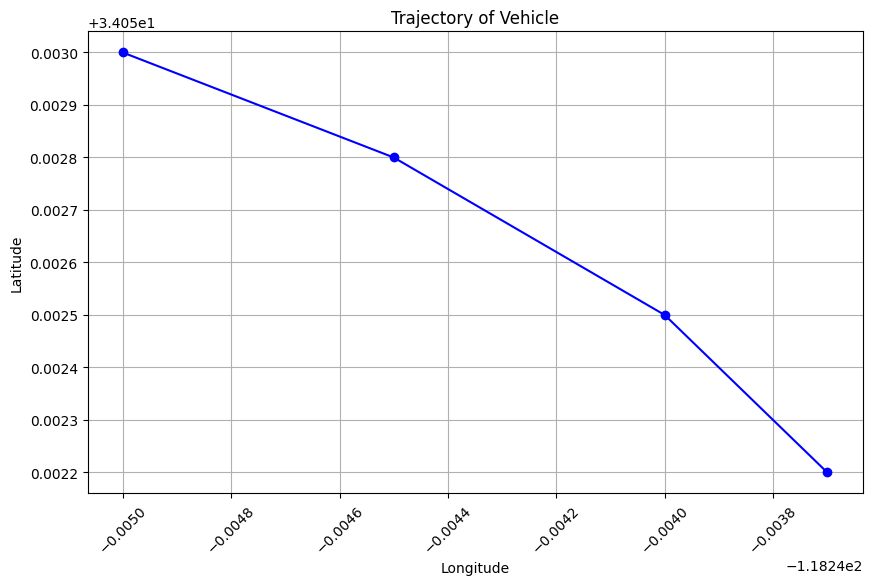

In [36]:
# Plotting the trajectory  
plt.figure(figsize=(10, 6))  
plt.plot(trajectory_df['Longitude'], trajectory_df['Latitude'], marker='o', color='b')  
plt.title('Trajectory of Vehicle')  
plt.xlabel('Longitude')  
plt.ylabel('Latitude')  
plt.grid()  
plt.xticks(rotation=45)  
plt.show()

In [37]:
from geopy.distance import great_circle  

# Function to calculate distance between two points  
def calculate_distance(row1, row2):  
    coords_1 = (row1['Latitude'], row1['Longitude'])  
    coords_2 = (row2['Latitude'], row2['Longitude'])  
    return great_circle(coords_1, coords_2).meters  

# Calculate distances and add to DataFrame  
distances = []  
for i in range(1, len(trajectory_df)):  
    distance = calculate_distance(trajectory_df.iloc[i - 1], trajectory_df.iloc[i])  
    distances.append(distance)  

# Append distances to DataFrame  
trajectory_df['Distance (m)'] = [0] + distances  
print(trajectory_df[['Timestamp', 'Latitude', 'Longitude', 'Speed', 'Distance (m)']])

            Timestamp  Latitude  Longitude  Speed  Distance (m)
0 2023-10-01 08:00:00   34.0522  -118.2437     10      0.000000
1 2023-10-01 08:05:00   34.0525  -118.2440     12     43.320586
2 2023-10-01 08:10:00   34.0528  -118.2445     11     56.874165
3 2023-10-01 08:15:00   34.0530  -118.2450      9     51.151156


In [40]:
import pandas as pd  
 

# Sample trajectory data  
data = {  
    'Vehicle ID': ['V1', 'V1', 'V1', 'V1', 'V2', 'V2', 'V2', 'V2'],  
    'Path': [  
        [(34.0522, -118.2437), (34.0525, -118.2440), (34.0528, -118.2445), (34.0530, -118.2450)],  
        [(34.0525, -118.2440), (34.0528, -118.2445), (34.0530, -118.2450)],  
        [(34.0510, -118.2460), (34.0512, -118.2465), (34.0515, -118.2470), (34.0518, -118.2475)],  
        [(34.0512, -118.2465), (34.0515, -118.2470), (34.0518, -118.2475)]  
    ]  
}  

# Create DataFrame  
df = pd.DataFrame(data)  

# Group paths by Vehicle ID  
trajectory_sequences = df.groupby('Vehicle ID')['Path'].apply(lambda x: list(x)).tolist()  

# Change the paths into a format suitable for prefixspan (list of lists)  
# Each path needs to be represented as a list of "patterns"  
patterns = [[(lat, long) for point in path for lat, long in point] for path in trajectory_sequences]  

# Flatten the list of paths into a sequence of lists  
sequences = [[point for path in patterns for point in path]]  

# Run PrefixSpan  
min_support = 2  
ps = PrefixSpan(sequences)  
frequent_patterns = ps.frequent(2)  

# Output the results  
print("Frequent Trajectory Patterns:")  
for pattern in frequent_patterns:  
    print(pattern)

ValueError: All arrays must be of the same length

In [46]:
import pandas as pd  
from collections import Counter  

# Sample trajectory data  
data = {  
    'Vehicle ID': ['V1', 'V1', 'V1', 'V1', 'V2', 'V2', 'V2', 'V2'],  
    'Path': [  
        [(34.0522, -118.2437), (34.0525, -118.2440), (34.0528, -118.2445)],  
        [(34.0525, -118.2440), (34.0528, -118.2445)],  
        [(34.0510, -118.2460), (34.0512, -118.2465), (34.0515, -118.2470)],  
        [(34.0512, -118.2465), (34.0515, -118.2470), (34.0518, -118.2475)],  
        [(34.0525, -118.2440), (34.0528, -118.2445), (34.0530, -118.2450)],  # second V1 route  
        [(34.0512, -118.2465), (34.0518, -118.2475)],  # second V2 route  
        [(34.0510, -118.2460), (34.0512, -118.2465), (34.0515, -118.2470)],  # second V2 route  
        [(34.0515, -118.2470), (34.0518, -118.2475)]  
    ]  
}  

# Create DataFrame  
df = pd.DataFrame(data)  
# print(df)

# Flatten the paths into sequences for frequent route identification  
route_list = []  
for path in df['Path']:  
    route_list.append(tuple(path))  # Store each route as a tuple  
    
print(len(route_list))

# Count occurrences of each route  
route_counter = Counter(route_list)  

# Convert the counter to a DataFrame for better visualization  
frequent_routes = pd.DataFrame(route_counter.items(), columns=['Route', 'Count'])  

# Filter results based on a minimum count threshold  
min_count_threshold = 2  
frequent_routes = frequent_routes[frequent_routes['Count'] >= min_count_threshold]  

# Output results  
print("Frequent Routes:")  


8
Frequent Routes:
